### Loading the Data

In [68]:
import pandas as pd
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

In [69]:
df = None

# Attempting to load a CSV file from a Google Drive link into a Pandas DataFrame.
try:
    # Original URL pointing to Google Drive file shared for viewing.
    url = 'https://drive.google.com/file/d/1xx0EV_nLt9shUSFJ7u5qAeeDrinZRnxf/view?usp=sharing'

    # Extracting file ID from the original URL to construct a direct download link.
    url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

    # Loading the CSV data from the constructed URL into a Pandas DataFrame.
    df = pd.read_csv(url)

    # Confirmation message upon successful loading of CSV data.
    print('Csv and Dataframe loaded.')

except Exception as e:
    # Handling any exceptions that may occur during the process and printing the error message.
    print('Exception occurred: ', str(e))


Csv and Dataframe loaded.


In [70]:
# exploring the dataset
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [71]:
# verifying the rows and columns in the dataset
df.shape

(16734, 19)

In [72]:
# verifying the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

#### Checking for missing values

In [73]:
df.isna().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

Handling of missing values

In [74]:
# Calculating the missing values

for each in df.columns:
    print('Percent of null values', each, ':', (df[each].isnull().mean() * 100).round(2))

Percent of null values Brand : 0.01
Percent of null values Year : 0.01
Percent of null values Model : 0.01
Percent of null values Car/Suv : 0.17
Percent of null values Title : 0.01
Percent of null values UsedOrNew : 0.01
Percent of null values Transmission : 0.01
Percent of null values Engine : 0.01
Percent of null values DriveType : 0.01
Percent of null values FuelType : 0.01
Percent of null values FuelConsumption : 0.01
Percent of null values Kilometres : 0.01
Percent of null values ColourExtInt : 0.01
Percent of null values Location : 2.69
Percent of null values CylindersinEngine : 0.01
Percent of null values BodyType : 1.69
Percent of null values Doors : 9.59
Percent of null values Seats : 10.19
Percent of null values Price : 0.02


In [75]:
# filling missing values 
# small => mean
# large => mode

for column in df.columns:
    if df[column].dtype == 'object':
        # For string columns, fill missing values with mode
        mode_value = df[column].mode().iloc[0]  # Get the mode value as a scalar
        df[column].fillna(mode_value, inplace=True)
    else:
        # For numeric columns, fill missing values with mean
        df[column].fillna(df[column].mean(), inplace=True)

In [76]:
# confirming that missing values does not exist in the dataframe

df.isna().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [77]:
# Replace specific values in the 'Price' and 'Kilometres' columns of the DataFrame.

# Replace 'POA' (Price on Application) with 0 in the 'Price' column.
df['Price'] = df['Price'].replace('POA', 0)

# Replace '-' (dash) with 0 in the 'Kilometres' column.
df['Kilometres'] = df['Kilometres'].replace('-', 0)


In [78]:
# Convert specified columns to integers, handling errors gracefully.

# Convert 'Kilometres' column to numeric, coercing errors to NaN, filling NaN with 0, and converting to integer.
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce').fillna(0).astype(int)

# Convert 'Price' column to numeric, coercing errors to NaN, filling NaN with 0, and converting to integer.
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)

# Verify the data types of 'Kilometres' and 'Price' columns after conversion.
df[['Kilometres', 'Price']].dtypes


Kilometres    int64
Price         int64
dtype: object

In [79]:
# Define functions to calculate quartiles and inter-quartile range (IQR)
def q1(series):
    """Calculate the first quartile (Q1)."""
    return series.quantile(0.25)


def q3(series):
    """Calculate the third quartile (Q3)."""
    return series.quantile(0.75)


def iqr(series):
    """Calculate the interquartile range (IQR)."""
    return q3(series) - q1(series)


def lower_outlier(series):
    """Calculate the lower outlier bound."""
    return (q1(series) - 1.5 * iqr(series)).round(2)


def upper_outlier(series):
    """Calculate the upper outlier bound."""
    return q3(series) + 1.5 * iqr(series)


def data_range(series):
    """Calculate the range of the data."""
    return series.max() - series.min()


def mode(series):
    """Calculate the mode of the data."""
    return series.mode()[0]


# Define a list of calculations to apply to each column
calculations = [
    "min",  # Minimum value
    "max",  # Maximum value
    "count",  # Count of non-null values
    "mean",  # Mean value
    "median",  # Median value
    lambda x: x.mode()[0],  # Mode value
    data_range,  # Range of the data
    q1,  # First quartile (Q1)
    q3,  # Third quartile (Q3)
    iqr,  # Inter-quartile range (IQR)
    "var",  # Sample Variance
    "std",  # Sample Standard deviation
    lower_outlier,  # Lower outlier bound
    upper_outlier  # Upper outlier bound
]

# Apply the calculations to each column in the dataframe (df)
result = df.agg(
    {
        "Price": calculations,  # Apply calculations to the 'Price' column
        "Kilometres": calculations  # Apply calculations to the 'Kilometres' column
    }
)

# Rename the 'mode' and 'range' rows for clarity
result.rename(index={result.index[5]: 'mode'}, inplace=True)  # Rename mode row
result.rename(index={result.index[6]: 'range'}, inplace=True)  # Rename range row
result.rename(index={result.index[-3]: 'variance'}, inplace=True)  # Rename range row
result.rename(index={result.index[-4]: 'standard deviation'}, inplace=True)  # Rename range row


# Define a function to format large numbers
def format_large_numbers(x):
    if abs(x) >= 1e6:
        return f'{x:.2e}'  # Scientific notation for numbers >= 1 million
    else:
        return f'{x:.2f}'  # Normal formatting for smaller numbers


# Apply formatting to each cell in the DataFrame
result = result.applymap(format_large_numbers)

# Display the resulting dataframe
result

,Price,Kilometres
min,0.00,0.00
max,1.50e+06,533849.00
count,16734.00,16734.00
mean,37190.56,96555.00
median,29300.00,82352.00
mode,29990.00,0.00
range,1.50e+06,533849.00
q1,18990.00,34807.00
q3,43990.00,143738.00
iqr,25000.00,108931.00


### Classification Model

In [80]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [81]:
# # Separate features (x) and target (y)
# x = df.drop(columns=['DriveType'])
# y = df['DriveType']

In [82]:
x = df.drop(columns=['DriveType']).columns
', '.join(list(x))
len(x)

18

In [83]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [84]:
df[['Brand', 'Year', 'Transmission', 'Engine', 'FuelType', 'Price', 'CylindersinEngine', 'BodyType']].head()

,Brand,Year,Transmission,Engine,FuelType,Price,CylindersinEngine,BodyType
0,Ssangyong,2022.0,Automatic,"4 cyl, 2.2 L",Diesel,51990,4 cyl,SUV
1,MG,2022.0,Automatic,"4 cyl, 1.5 L",Premium,19990,4 cyl,Hatchback
2,BMW,2022.0,Automatic,"4 cyl, 2 L",Premium,108988,4 cyl,Coupe
3,Mercedes-Benz,2011.0,Automatic,"8 cyl, 5.5 L",Premium,32990,8 cyl,Coupe
4,Renault,2022.0,Automatic,"4 cyl, 1.3 L",Unleaded,34990,4 cyl,SUV


In [85]:
df['Brand'].nunique()

76

In [86]:
df['DriveType'].unique()

array(['AWD', 'Front', 'Rear', 'Other', '4WD'], dtype=object)

In [87]:
def get_x_y(selection="all"):
    _x = None
    _y = df['DriveType']
    if selection == "all":
        _x = df.drop(columns=['DriveType'])
    elif selection == "nine":
        _x = df[['Brand', 'Year', 'Car/Suv', 'Transmission', 'Engine', 'FuelType', 'Price', 'CylindersinEngine',
                 'BodyType']]
    elif selection == "seven":
        _x = df[['Year', 'Transmission', 'Engine', 'FuelType', 'Price', 'CylindersinEngine', 'BodyType']]
    return _x, _y


def preprocess_data(_x):
    """
    Preprocesses input data 'x' using StandardScaler for numerical features and OneHotEncoder for categorical features.

    Parameters:
    x (DataFrame): Input DataFrame containing features to be preprocessed.

    Returns:
    numpy.ndarray: Transformed data after preprocessing.
    """
    numerical_features = ['Year', 'Price']
    categorical_features = list(set(_x) - set(numerical_features))

    # Define transformers
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first')

    # Create preprocessor using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # Return transformed data
    return preprocessor.fit_transform(_x)


# Define classification functions
def train_random_forest(_x_train, _y_train):
    """
    Trains a Random Forest Classifier using the input training data.

    Parameters:
    _x_train (numpy.ndarray): Transformed features training data.
    _y_train (Series): Target training data.

    Returns:
    RandomForestClassifier: Trained Random Forest classifier model.
    """
    clf = RandomForestClassifier(random_state=42)
    clf.fit(_x_train, _y_train)
    return clf


def train_svm(_x_train, _y_train):
    """
    Trains a Support Vector Machine (SVM) Classifier using the input training data.

    Parameters:
    _x_train (numpy.ndarray): Transformed features training data.
    _y_train (Series): Target training data.

    Returns:
    SVC: Trained SVM classifier model.
    """
    clf = SVC(kernel='linear', random_state=42)
    clf.fit(_x_train, _y_train)
    return clf


def evaluate_model(clf, _x_test, _y_test):
    """
    Evaluates the performance of a classifier model using accuracy score on test data.

    Parameters:
    clf: Trained classifier model.
    _x_test (numpy.ndarray): Transformed features test data.
    _y_test (Series): Target test data.

    Returns:
    float: Accuracy score of the model on the test data.
    int: the index of the predicted data.
    """
    y_pred = clf.predict(_x_test)
    accuracy = accuracy_score(_y_test, y_pred)
    return accuracy, y_pred


# Function to plot evaluation results using matplotlib
def plot_evaluation_results(_models, _accuracies):
    """
    Plots bar chart comparing accuracy scores of different classifier models.

    Parameters:
    models (list): List of model names.
    accuracies (list): List of accuracy scores corresponding to each model.
    """
    plt.figure(figsize=(8, 5))
    plt.bar(_models, _accuracies, color=['blue', 'green'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Classifier Accuracy Comparison')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy percentage
    plt.grid(True)
    plt.show()


# Function to plot evaluation results using Plotly Express
def plot_evaluation_results_line(_models, _accuracies):
    """
    Plots line chart comparing accuracy scores of different classifier models using Plotly Express.

    Parameters:
    models (list): List of model names.
    accuracies (list): List of accuracy scores corresponding to each model.
    """
    fig = px.line(x=_models, y=_accuracies, title='Classifier Accuracy Comparison',
                  labels={'x': 'Models', 'y': 'Accuracy'})
    fig.show()


results = []


def run_classifiers_model(test_size, _x, _y):
    """
    Runs Random Forest and SVM classifiers on preprocessed data with a specified test size.
    Stores the results in a list and optionally prints accuracy scores.

    Parameters:
    test_size (float): Proportion of the dataset to include in the test split.

    Returns:
    None
    """
    # Split data into train and test sets
    X_processed = preprocess_data(_x)
    X_train, X_test, y_train, y_test = train_test_split(X_processed, _y, test_size=test_size, random_state=42)

    # Train Random Forest and SVM classifiers
    rf_model = train_random_forest(X_train, y_train)
    svm_model = train_svm(X_train, y_train)

    # Evaluate models on the test set
    rf_accuracy, rf_y_pred = evaluate_model(rf_model, X_test, y_test)
    svm_accuracy, svm_y_pred = evaluate_model(svm_model, X_test, y_test)

    rf_mislabeled_count = (y_test.values.ravel() != rf_y_pred).sum()
    svm_mislabeled_count = (y_test.values.ravel() != svm_y_pred).sum()

    test_size_count = X_test.shape[0]

    print(f"Features used for this model are: \n{', '.join(_x.columns)}, \nTarget = {_y.name}\n")
    print(f"Train Size: {(1 - test_size) * 100} and Test Size: {test_size * 100}\n")
    print(
        f"Random Forest Classifier : Number of mislabeled points out of a total {test_size_count} points : {rf_mislabeled_count}")
    print(
        f"SVM Classifier : Number of mislabeled points out of a total {test_size_count} points : {svm_mislabeled_count}")

    # Append results to the global list 'results'
    results.append({
        'FeatureSize': len(_x.columns),
        'TestSize': test_size_count,
        'TestSize(%)': round(test_size * 100, 2),
        'RandomForestAccuracy(%)': round(rf_accuracy * 100, 2),
        'SVMAccuracy(%)': round(svm_accuracy * 100, 2),
        'MislabeledPoints(RF)': rf_mislabeled_count,
        'MislabeledPoints(SVM)': svm_mislabeled_count
    })

    # Plot evaluation results
    models = ['Random Forest', 'SVM']
    accuracies = [rf_accuracy, svm_accuracy]
    plot_evaluation_results(models, accuracies)
    print("\n")

    _best_model = None
    _best_model_name = None
    _best_model_accuracy = 0

    if rf_accuracy > svm_accuracy:
        _best_model_accuracy = rf_accuracy
        _best_model_name = 'Random Forest'
        _best_model = rf_model
    else:
        _best_model_accuracy = svm_accuracy
        _best_model_name = 'Support Vector Machine'
        _best_model = svm_model

    return _best_model, _best_model_name, _best_model_accuracy


In [88]:
best_model = None
best_model_name = None
best_model_accuracy = 0

Features used for this model are: 
Brand, Year, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, FuelType, FuelConsumption, Kilometres, ColourExtInt, Location, CylindersinEngine, BodyType, Doors, Seats, Price, 
Target = DriveType

Train Size: 70.0 and Test Size: 30.0

Random Forest Classifier : Number of mislabeled points out of a total 5021 points : 305
SVM Classifier : Number of mislabeled points out of a total 5021 points : 308


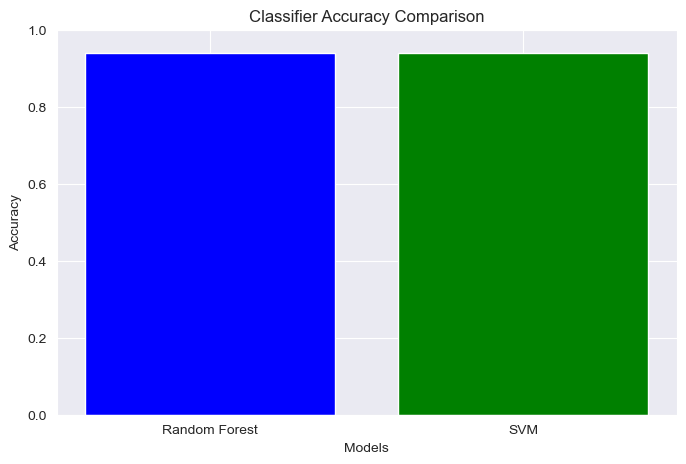



Features used for this model are: 
Brand, Year, Car/Suv, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 70.0 and Test Size: 30.0

Random Forest Classifier : Number of mislabeled points out of a total 5021 points : 520
SVM Classifier : Number of mislabeled points out of a total 5021 points : 752


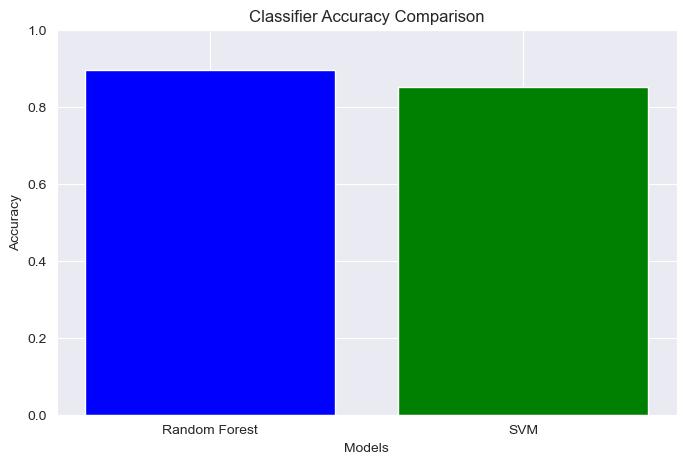



Features used for this model are: 
Year, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 70.0 and Test Size: 30.0

Random Forest Classifier : Number of mislabeled points out of a total 5021 points : 891
SVM Classifier : Number of mislabeled points out of a total 5021 points : 1123


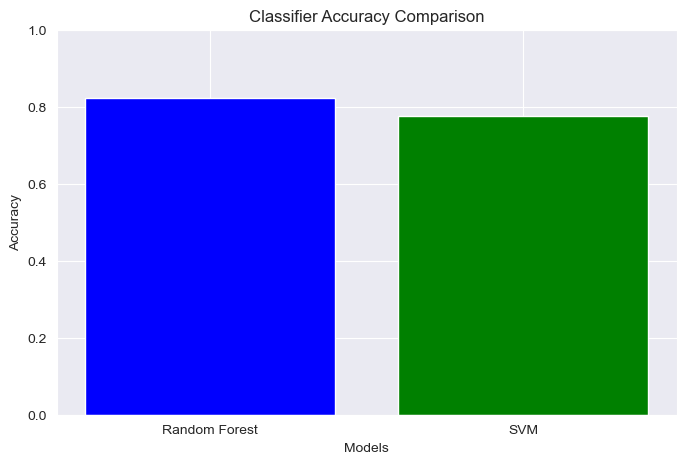



Features used for this model are: 
Brand, Year, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, FuelType, FuelConsumption, Kilometres, ColourExtInt, Location, CylindersinEngine, BodyType, Doors, Seats, Price, 
Target = DriveType

Train Size: 75.0 and Test Size: 25.0

Random Forest Classifier : Number of mislabeled points out of a total 4184 points : 253
SVM Classifier : Number of mislabeled points out of a total 4184 points : 242


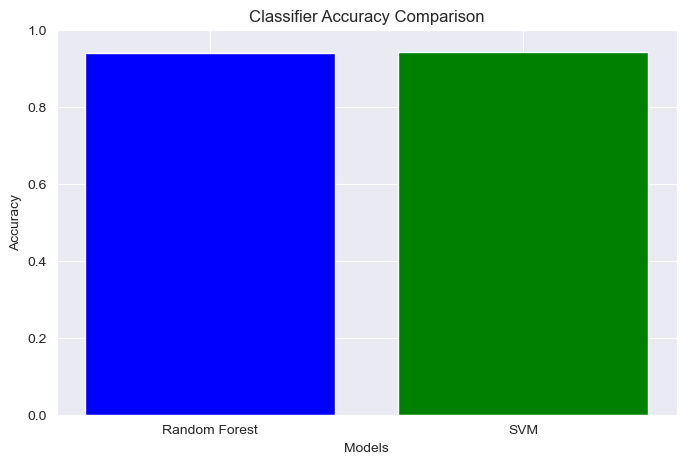



Features used for this model are: 
Brand, Year, Car/Suv, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 75.0 and Test Size: 25.0

Random Forest Classifier : Number of mislabeled points out of a total 4184 points : 440
SVM Classifier : Number of mislabeled points out of a total 4184 points : 631


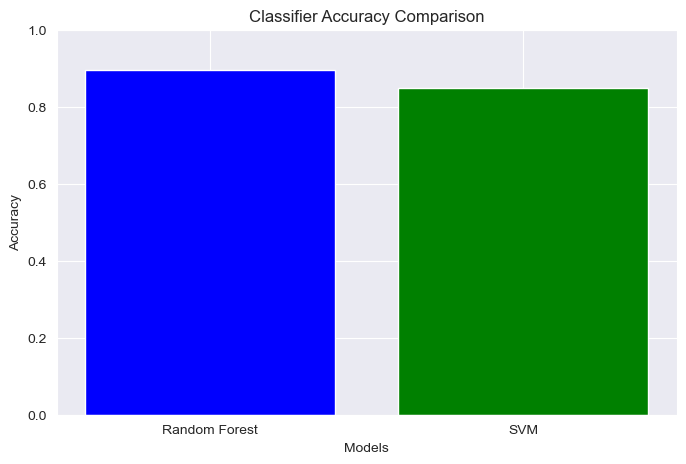



Features used for this model are: 
Year, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 75.0 and Test Size: 25.0

Random Forest Classifier : Number of mislabeled points out of a total 4184 points : 724
SVM Classifier : Number of mislabeled points out of a total 4184 points : 937


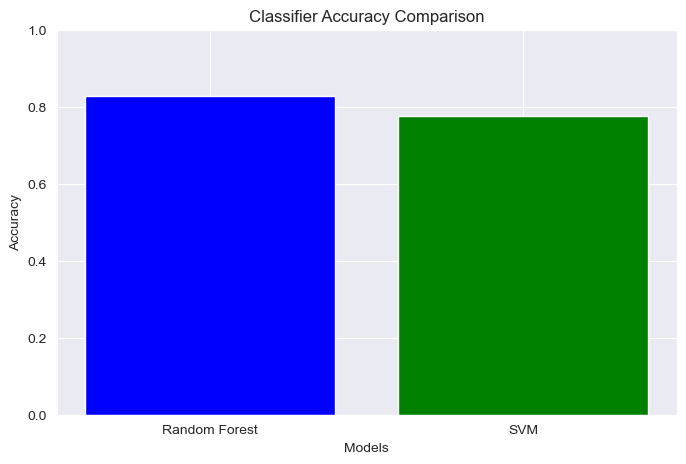



Features used for this model are: 
Brand, Year, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, FuelType, FuelConsumption, Kilometres, ColourExtInt, Location, CylindersinEngine, BodyType, Doors, Seats, Price, 
Target = DriveType

Train Size: 80.0 and Test Size: 20.0

Random Forest Classifier : Number of mislabeled points out of a total 3347 points : 201
SVM Classifier : Number of mislabeled points out of a total 3347 points : 178


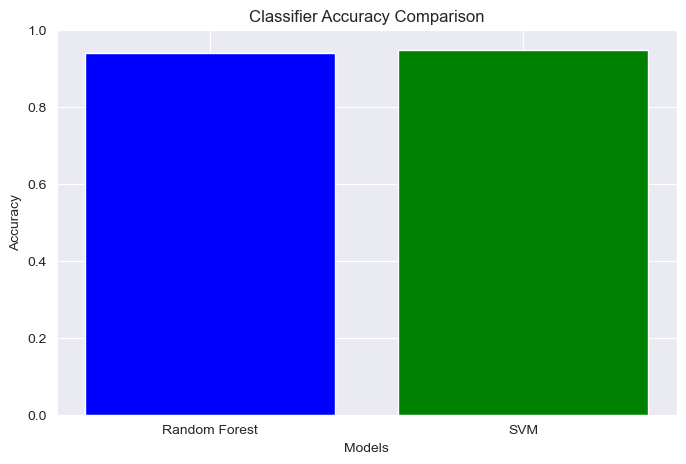



Features used for this model are: 
Brand, Year, Car/Suv, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 80.0 and Test Size: 20.0

Random Forest Classifier : Number of mislabeled points out of a total 3347 points : 351
SVM Classifier : Number of mislabeled points out of a total 3347 points : 493


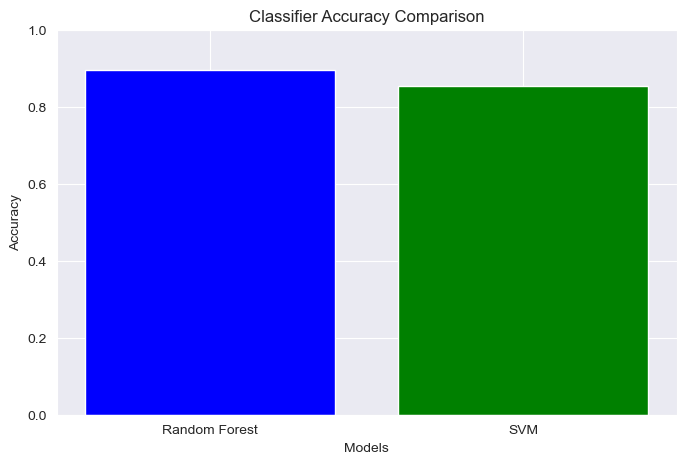



Features used for this model are: 
Year, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 80.0 and Test Size: 20.0

Random Forest Classifier : Number of mislabeled points out of a total 3347 points : 572
SVM Classifier : Number of mislabeled points out of a total 3347 points : 751


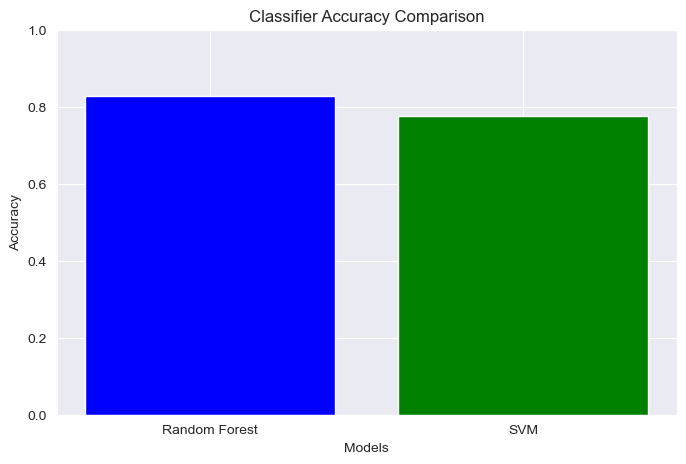



Features used for this model are: 
Brand, Year, Model, Car/Suv, Title, UsedOrNew, Transmission, Engine, FuelType, FuelConsumption, Kilometres, ColourExtInt, Location, CylindersinEngine, BodyType, Doors, Seats, Price, 
Target = DriveType

Train Size: 85.0 and Test Size: 15.0

Random Forest Classifier : Number of mislabeled points out of a total 2511 points : 133
SVM Classifier : Number of mislabeled points out of a total 2511 points : 138


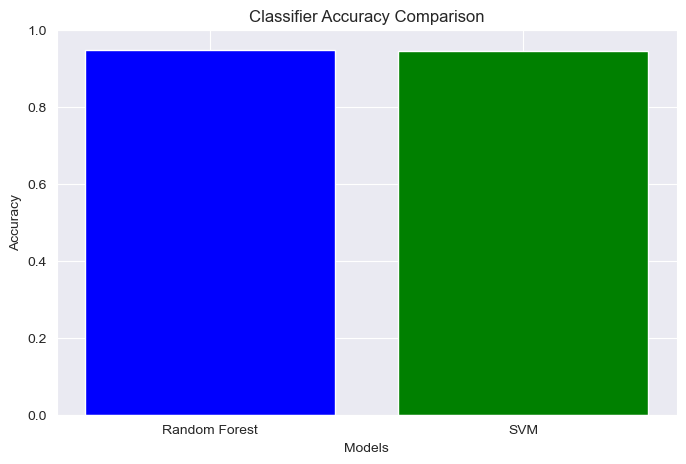



Features used for this model are: 
Brand, Year, Car/Suv, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 85.0 and Test Size: 15.0

Random Forest Classifier : Number of mislabeled points out of a total 2511 points : 262
SVM Classifier : Number of mislabeled points out of a total 2511 points : 384


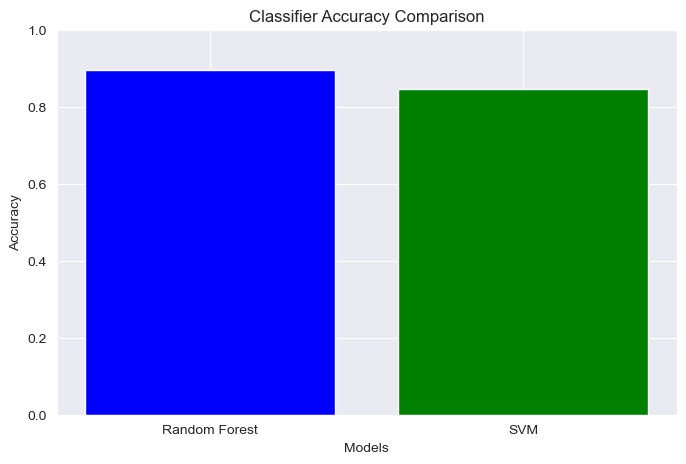



Features used for this model are: 
Year, Transmission, Engine, FuelType, Price, CylindersinEngine, BodyType, 
Target = DriveType

Train Size: 85.0 and Test Size: 15.0

Random Forest Classifier : Number of mislabeled points out of a total 2511 points : 439
SVM Classifier : Number of mislabeled points out of a total 2511 points : 559


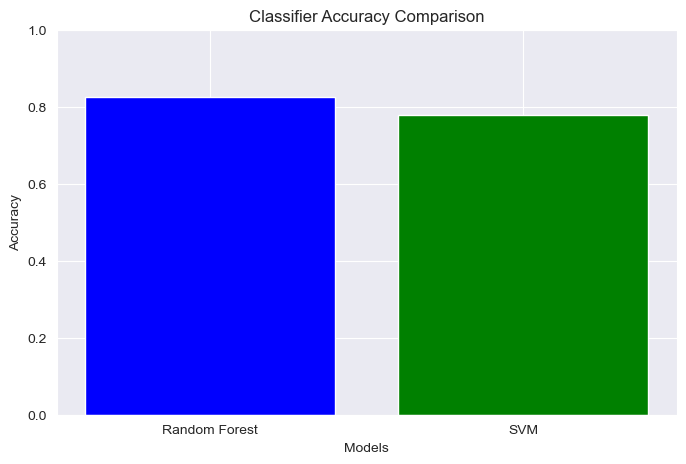

In [89]:
# Loop through different test sizes and different feature size and run the classifiers
test_sizes = [0.3, 0.25, 0.2, 0.15]
feature_sizes = ["all", "nine", "seven"]

for t_size in test_sizes:
    for f_size in feature_sizes:
        x, y = get_x_y(f_size)
        _b_model, _b_model_name, _b_model_accuracy = run_classifiers_model(t_size, x, y)

        # if _b_model_accuracy > best_model_accuracy:
        #     best_model_accuracy = _b_model_accuracy
        #     best_model_name = _b_model_name
        #     best_model = _b_model

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

In [90]:
print("Results DataFrame:")
results_df

Results DataFrame:


,FeatureSize,TestSize,TestSize(%),RandomForestAccuracy(%),SVMAccuracy(%),MislabeledPoints(RF),MislabeledPoints(SVM)
0,18,5021,30.0,93.93,93.87,305,308
1,9,5021,30.0,89.64,85.02,520,752
2,7,5021,30.0,82.25,77.63,891,1123
3,18,4184,25.0,93.95,94.22,253,242
4,9,4184,25.0,89.48,84.92,440,631
5,7,4184,25.0,82.70,77.61,724,937
6,18,3347,20.0,93.99,94.68,201,178
7,9,3347,20.0,89.51,85.27,351,493
8,7,3347,20.0,82.91,77.56,572,751
9,18,2511,15.0,94.70,94.50,133,138


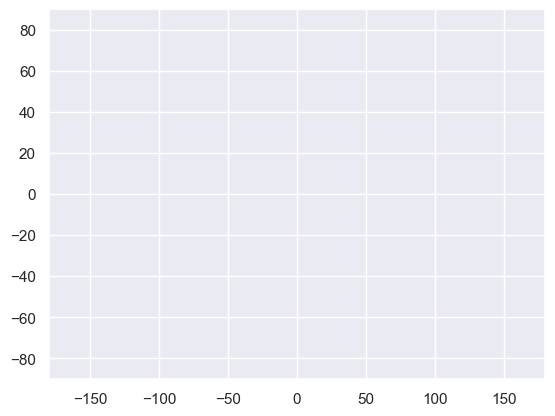

In [91]:
#import lybraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans

#ploating data
plt.scatter(df['Year'], df['Price'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)

#selecting amount of clustering
kmeans = KMeans(25, n_init=1)

In [ ]:
clusters = kmeans.fit_predict(x)
clusters

In [ ]:

d_clusters = x.copy()
d_clusters['Clusters'] = clusters

In [93]:
df.head(2)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990


In [94]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [ ]:
# from sklearn.metrics import silhouette_score
# 
# # Process the dataset
# # processed_data = preprocess_data(data)
# 
# # Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)
# 
# 
# # Determine the range of clusters to test
# def perform_kmeans_clustering(data, k_range):
#     results = []
#     for k in k_range:
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         kmeans.fit(data)
#         labels = kmeans.labels_
#         inertia = kmeans.inertia_
#         silhouette_avg = silhouette_score(data, labels)
#         results.append((k, inertia, silhouette_avg))
#     return results
# 
# 
# # Define the range of k values
# k_range = range(2, 11)
# 
# # Perform clustering
# results = perform_kmeans_clustering(scaled_data, k_range)
# 
# # Convert results to DataFrame for easy visualization
# results_df = pd.DataFrame(results, columns=['Number of Clusters', 'Inertia', 'Silhouette Score'])
# 
# # Print results
# print(results_df)
# 
# # Visualize the Silhouette Scores
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='Number of Clusters', y='Silhouette Score', data=results_df, marker='o')
# plt.title('Silhouette Score for Different Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.grid(True)
# plt.show()
# 
# # Optimal number of clusters based on silhouette score
# optimal_k = results_df.loc[results_df['Silhouette Score'].idxmax(), 'Number of Clusters']
# print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")
# 
# # Perform K-Means clustering with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# clusters = kmeans.fit_predict(scaled_data)
# 
# # Add cluster labels to the original data
# data['Cluster'] = clusters
# 
# # Visualize clusters (if possible, e.g., using PCA for dimensionality reduction)
# from sklearn.decomposition import PCA
# 
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(scaled_data)
# data_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
# data_pca['Cluster'] = clusters
# 
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=data_pca, marker='o')
# plt.title('Clustering Visualization using PCA')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.legend(title='Cluster')
# plt.grid(True)
# plt.show()

In [96]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Load the dataset
# # data = pd.read_csv('your_dataset.csv')
# data = df
# 
# 
# # Preprocess the data
# def preprocess_data(df):
#     # Drop non-numeric columns and fill missing values
#     df = df.copy()
#     df = df.drop(
#         columns=['Brand', 'Model', 'Title', 'UsedOrNew', 'Transmission', 'Location', 'ColourExtInt', 'DriveType',
#                  'FuelType'])
# 
#     # Convert categorical variables to dummy variables
#     df = pd.get_dummies(df, drop_first=True)
# 
#     # Handle missing values
#     df = df.fillna(df.median())
# 
#     return df
# 
# 
# # Process the dataset
# # processed_data = preprocess_data(data)
# 
# # Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
# 
# 
# # Determine the range of clusters to test
# def perform_kmeans_clustering(data, k_range):
#     results = []
#     for k in k_range:
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         kmeans.fit(data)
#         labels = kmeans.labels_
#         inertia = kmeans.inertia_
#         silhouette_avg = silhouette_score(data, labels)
#         results.append((k, inertia, silhouette_avg))
#     return results
# 
# 
# # Define the range of k values
# k_range = range(2, 11)
# 
# # Perform clustering
# results = perform_kmeans_clustering(scaled_data, k_range)
# 
# # Convert results to DataFrame for easy visualization
# results_df = pd.DataFrame(results, columns=['Number of Clusters', 'Inertia', 'Silhouette Score'])
# 
# # Print results
# print(results_df)
# 
# # Visualize the Silhouette Scores
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='Number of Clusters', y='Silhouette Score', data=results_df, marker='o')
# plt.title('Silhouette Score for Different Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.grid(True)
# plt.show()
# 
# # Optimal number of clusters based on silhouette score
# optimal_k = results_df.loc[results_df['Silhouette Score'].idxmax(), 'Number of Clusters']
# print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")
# 
# # Perform K-Means clustering with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# clusters = kmeans.fit_predict(scaled_data)
# 
# # Add cluster labels to the original data
# data['Cluster'] = clusters
# 
# 
# # Visualize clusters using scatter plots for selected numerical features
# def visualize_clusters(df, features, clusters):
#     plt.figure(figsize=(14, 10))
#     sns.scatterplot(x=features[0], y=features[1], hue=clusters, palette='tab10', data=df, marker='o')
#     plt.title(f'Clustering Visualization using {features[0]} and {features[1]}')
#     plt.xlabel(features[0])
#     plt.ylabel(features[1])
#     plt.legend(title='Cluster')
#     plt.grid(True)
#     plt.show()
# 
# 
# # Select numerical features for visualization
# numerical_features = ['Price', 'Kilometres']  # Example features, adjust as needed
# visualize_clusters(data, numerical_features, clusters)
# 
# # Pairwise plots (if you have more than 2 features)
# sns.pairplot(data, hue='Cluster', vars=numerical_features, palette='tab10')
# plt.show()


ValueError: could not convert string to float: 'Ssangyong'

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
# data = pd.read_csv('your_dataset.csv')

data = df

# Preprocess the data
# def preprocess_data(df):
#     # Drop non-numeric columns and fill missing values
#     df = df.copy()
#     df = df.drop(columns=['Brand', 'Model', 'Title', 'UsedOrNew', 'Transmission', 'Location', 'ColourExtInt', 'DriveType', 'FuelType'])
#     
#     # Convert categorical variables to dummy variables
#     df = pd.get_dummies(df, drop_first=True)
#     
#     # Handle missing values
#     df = df.fillna(df.median())
#     
#     return df

# Process the dataset
# processed_data = preprocess_data(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


# Determine the range of clusters to test
def perform_kmeans_clustering(data, k_range):
    results = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        wcss = kmeans.inertia_
        # Get the size of each cluster
        cluster_sizes = np.bincount(labels)
        results.append((k, wcss, cluster_sizes))
    return results


# Define the range of k values
k_range = range(2, 11)

# Perform clustering
results = perform_kmeans_clustering(scaled_data, k_range)

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results, columns=['Number of Clusters', 'WCSS', 'Cluster Sizes'])

# Print results
print(results_df)

# Visualize the WCSS
plt.figure(figsize=(10, 6))
plt.plot(results_df['Number of Clusters'], results_df['WCSS'], marker='o')
plt.title('WCSS for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Select the optimal number of clusters based on WCSS and cluster sizes
optimal_k = results_df.loc[results_df['WCSS'].idxmin(), 'Number of Clusters']
print(f"The optimal number of clusters based on WCSS is: {optimal_k}")

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = clusters


# Visualize clusters using scatter plots for selected numerical features
def visualize_clusters(df, features, clusters):
    plt.figure(figsize=(14, 10))
    sns.scatterplot(x=features[0], y=features[1], hue=clusters, palette='tab10', data=df, marker='o')
    plt.title(f'Clustering Visualization using {features[0]} and {features[1]}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


# Select numerical features for visualization
numerical_features = ['Price', 'Kilometres']  # Example features, adjust as needed
visualize_clusters(data, numerical_features, clusters)

# Visualize cluster size distribution
plt.figure(figsize=(10, 6))
for k, sizes in zip(results_df['Number of Clusters'], results_df['Cluster Sizes']):
    plt.bar(range(k), sizes, label=f'{k} Clusters')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Samples')
plt.legend(title='Number of Clusters')
plt.grid(True)
plt.show()


ValueError: could not convert string to float: 'Ssangyong'

In [98]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Load the dataset
# data = df
# 
# 
# # Preprocess the data
# def preprocess_data(df):
#     df = df.copy()
# 
#     # Drop non-numeric columns that won't be used for clustering
#     non_numeric_columns = ['Brand', 'Model', 'Title', 'UsedOrNew', 'Transmission', 'Location', 'ColourExtInt',
#                            'DriveType', 'FuelType']
#     df = df.drop(columns=non_numeric_columns, errors='ignore')
# 
#     # Convert categorical variables to dummy variables
#     df = pd.get_dummies(df, drop_first=True)
# 
#     # Handle missing values: Fill with median for numeric columns
#     df = df.fillna(df.median(numeric_only=True))
# 
#     return df
# 
# 
# # Process the dataset
# processed_data = preprocess_data(data)
# 
# # Check the processed data
# print(processed_data.head())
# 
# # Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(processed_data)
# 
# 
# # Determine the range of clusters to test
# def perform_kmeans_clustering(data, k_range):
#     results = []
#     for k in k_range:
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         kmeans.fit(data)
#         labels = kmeans.labels_
#         wcss = kmeans.inertia_
#         # Get the size of each cluster
#         cluster_sizes = np.bincount(labels)
#         results.append((k, wcss, cluster_sizes))
#     return results
# 
# 
# # Define the range of k values
# k_range = range(2, 11)
# 
# # Perform clustering
# results = perform_kmeans_clustering(scaled_data, k_range)
# 
# # Convert results to DataFrame for easy visualization
# results_df = pd.DataFrame(results, columns=['Number of Clusters', 'WCSS', 'Cluster Sizes'])
# 
# # Print results
# print(results_df)
# 
# # Visualize the WCSS
# plt.figure(figsize=(10, 6))
# plt.plot(results_df['Number of Clusters'], results_df['WCSS'], marker='o')
# plt.title('WCSS for Different Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.grid(True)
# plt.show()
# 
# # Select the optimal number of clusters based on WCSS and cluster sizes
# optimal_k = results_df.loc[results_df['WCSS'].idxmin(), 'Number of Clusters']
# print(f"The optimal number of clusters based on WCSS is: {optimal_k}")
# 
# # Perform K-Means clustering with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# clusters = kmeans.fit_predict(scaled_data)
# 
# # Add cluster labels to the original data
# data['Cluster'] = clusters
# 
# 
# # Visualize clusters using scatter plots for selected numerical features
# def visualize_clusters(df, features, clusters):
#     plt.figure(figsize=(14, 10))
#     sns.scatterplot(x=features[0], y=features[1], hue=clusters, palette='tab10', data=df, marker='o')
#     plt.title(f'Clustering Visualization using {features[0]} and {features[1]}')
#     plt.xlabel(features[0])
#     plt.ylabel(features[1])
#     plt.legend(title='Cluster')
#     plt.grid(True)
#     plt.show()
# 
# 
# # Select numerical features for visualization
# numerical_features = ['Price', 'Kilometres']  # Example features, adjust as needed
# visualize_clusters(data, numerical_features, clusters)
# 
# # Visualize cluster size distribution
# plt.figure(figsize=(10, 6))
# for k, sizes in zip(results_df['Number of Clusters'], results_df['Cluster Sizes']):
#     plt.bar(range(k), sizes, label=f'{k} Clusters')
# plt.title('Cluster Size Distribution')
# plt.xlabel('Cluster Number')
# plt.ylabel('Number of Samples')
# plt.legend(title='Number of Clusters')
# plt.grid(True)
# plt.show()


     Year  Kilometres   Price  Car/Suv_03 **** ****\n  Car/Suv_07 **** ****\n  \
0  2022.0        5595   51990                       0                       0   
1  2022.0          16   19990                       0                       0   
2  2022.0        8472  108988                       0                       0   
3  2011.0      136517   32990                       0                       0   
4  2022.0        1035   34990                       0                       0   

   Car/Suv_08 **** ****\n  Car/Suv_3MT True Value Auto  Car/Suv_4B4 Warehouse  \
0                       0                            0                      0   
1                       0                            0                      0   
2                       0                            0                      0   
3                       0                            0                      0   
4                       0                            0                      0   

   Car/Suv_4x4 Mega Centre

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [100]:
from sklearn.preprocessing import LabelEncoder

# Select categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.info()

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Combine the transformed columns
X = df.values

X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16734 non-null  int64  
 1   Year               16734 non-null  float64
 2   Model              16734 non-null  int64  
 3   Car/Suv            16734 non-null  int64  
 4   Title              16734 non-null  int64  
 5   UsedOrNew          16734 non-null  int64  
 6   Transmission       16734 non-null  int64  
 7   Engine             16734 non-null  int64  
 8   DriveType          16734 non-null  int64  
 9   FuelType           16734 non-null  int64  
 10  FuelConsumption    16734 non-null  int64  
 11  Kilometres         16734 non-null  float64
 12  ColourExtInt       16734 non-null  int64  
 13  Location           16734 non-null  int64  
 14  CylindersinEngine  16734 non-null  int64  
 15  BodyType           16734 non-null  int64  
 16  Doors              167

array([[ 1.00298972,  1.09973741,  0.91895628, ..., -0.01479802,
         1.71225277,  0.39811516],
       [-0.06284446,  1.09973741,  0.31971152, ...,  1.47694907,
        -0.03109777, -0.46270717],
       [-2.0976188 ,  1.09973741, -1.69170695, ..., -2.99829219,
        -0.90277305,  1.93140114],
       ...,
       [ 1.09988373,  1.09973741,  1.45781204, ..., -0.01479802,
        -0.03109777, -0.0513955 ],
       [ 0.17939058, -0.04368792, -0.30740509, ..., -0.01479802,
        -0.03109777,  0.12636431],
       [ 0.17939058,  0.90916652, -1.24111205, ..., -0.01479802,
        -0.03109777,  0.77198106]])

In [101]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [103]:
kmeans = KMeans(n_clusters=3, random_state=42)
X_clustered = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=X_clustered, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [109]:
!pip install --upgrade scikit-learn matplotlib pandas


DEPRECATION: Loading egg at /Users/mac/anaconda3/lib/python3.11/site-packages/python_docx-1.1.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/mac/anaconda3/lib/python3.11/site-packages/Pattern-3.6.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7d/d7/fb80c63062b60b1fa5dcb2d4dd3a4e83bd8c68cdc83cf6ff8c016228f184/scikit_learn-1.5.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/46/81/38bc95cf20ce6ed9dd5e7aec805bf1efc931e3fdeb9c5b593d00634a4747/matplotlib-3.9.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/16/

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Sample DataFrame
data = {
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
    'value1': [10, 20, 10, 30, 20, 30, 10],
    'value2': [5.0, 10.0, 5.0, 15.0, 10.0, 15.0, 5.0]
}
df = pd.DataFrame(data)

# Select categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Combine the transformed columns
X = df.values

# Check for NaN or infinite values
if np.any(np.isnan(X)) or np.any(np.isinf(X)):
    raise ValueError("Data contains NaN or infinite values.")

# Ensure X is a valid NumPy array
print("Type of X:", type(X))
print("Shape of X:", X.shape)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
try:
    X_clustered = kmeans.fit_predict(X)
    print("Clustering done successfully.")
except Exception as e:
    print("An error occurred:", e)


Type of X: <class 'numpy.ndarray'>
Shape of X: (7, 3)
An error occurred: 'NoneType' object has no attribute 'split'


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Example DataFrame
data = {
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
    'value1': [10, 20, 10, 30, 20, 30, 10],
    'value2': [5.0, 10.0, 5.0, 15.0, 10.0, 15.0, 5.0]
}
df = pd.DataFrame(data)

# Select categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Combine the transformed columns
X = df.values

# Check for NaN or infinite values
if np.any(np.isnan(X)) or np.any(np.isinf(X)):
    raise ValueError("Data contains NaN or infinite values.")

# Ensure X is a valid NumPy array
print("Type of X:", type(X))
print("Shape of X:", X.shape)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
try:
    X_clustered = kmeans.fit_predict(X)
    print("Clustering done successfully.")
except Exception as e:
    print("An error occurred:", e)


Type of X: <class 'numpy.ndarray'>
Shape of X: (7, 3)
An error occurred: 'NoneType' object has no attribute 'split'


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
